In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('cars.csv')

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df.shape

(205, 26)

In [6]:
df.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [7]:
df.carbody.unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [8]:
# Lets declare our target
target = df.price

#### Lets create a Correlation Heatmap which is sorted in order

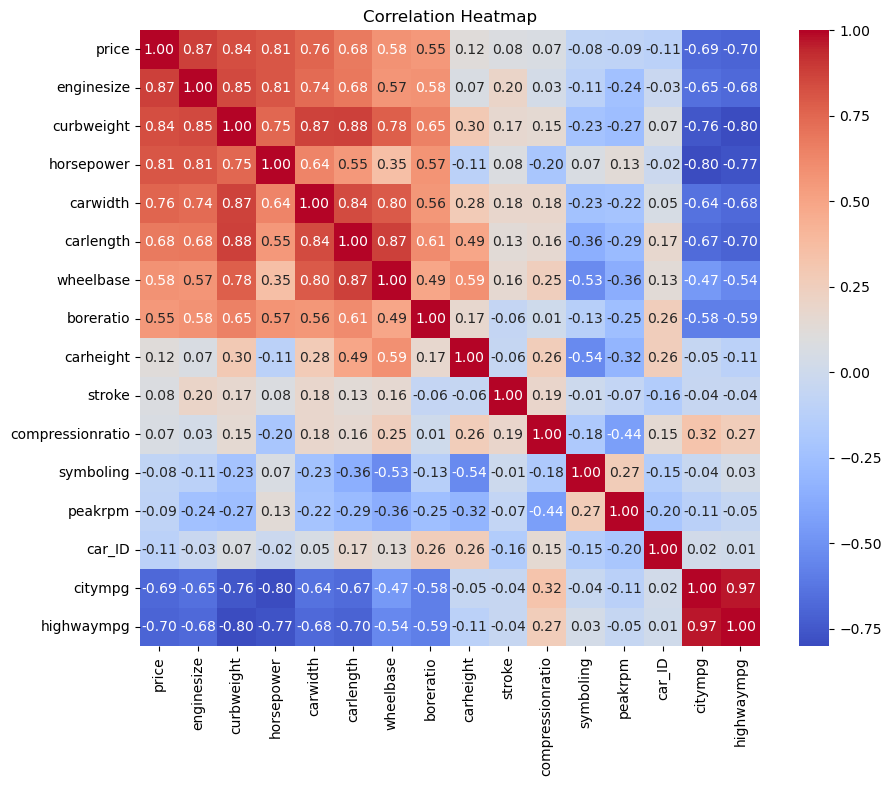

In [14]:
data_numeric = df.select_dtypes(include = [np.number])
corr_matrix = data_numeric.corr()

# Lets sort the rows and columns of our heatmap 
# To sort the rows
sorted_corr = corr_matrix.sort_values('price', ascending=False, axis = 0)
# Sort by the columns
sorted_corr = sorted_corr.sort_values('price', ascending=False, axis = 1)

# Plot the heatmap
plt.figure(figsize = (10,8))
sns.heatmap(sorted_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

### Lets check out the correlation with Price 

<Axes: >

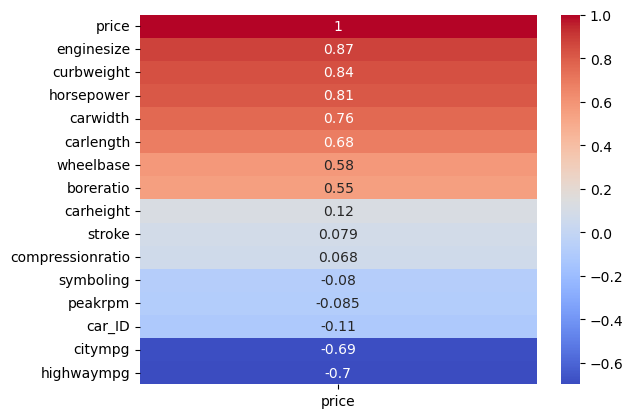

In [17]:
sns.heatmap(data = df.corr(numeric_only = True)[['price']].sort_values('price', ascending=False), annot=True, cmap='coolwarm')

### Lets create a Linear Regression Model to predict with enginesize

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df[['enginesize']], df[['price']], test_size=0.2, random_state=45)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(164, 1)
(41, 1)
(164, 1)
(41, 1)


In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
model.score(X_test, y_test)

0.826093616258313

In [27]:
# Lets get the slope of our linear regression curve
slope = model.coef_
print("Slope is: ", slope)

Slope is:  [[167.75082652]]


We can notice the slope is an array

In [25]:
intercept = model.intercept_
print("Intercept is: ", intercept)

Intercept is:  [-8103.02567897]


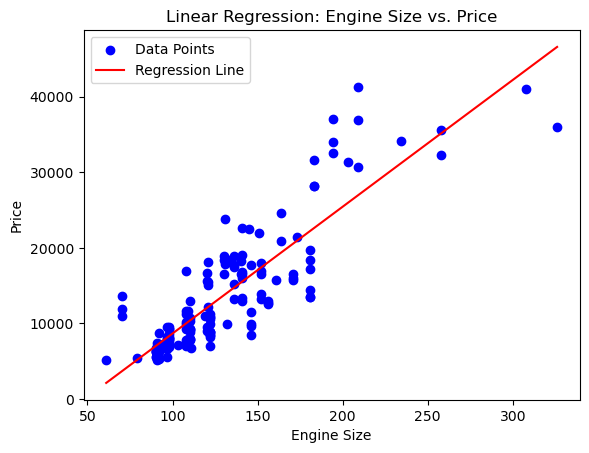

In [31]:
plt.scatter(X_train, y_train, color = 'blue', label = 'Data Points')

x_values = np.linspace(X_train.min(), X_train.max(), 100)
y_values = slope*x_values + intercept

plt.plot(x_values, y_values, color='red', label='Regression Line')
plt.xlabel('Engine Size')
plt.ylabel("Price")
plt.title('Linear Regression: Engine Size vs. Price')
plt.legend()
plt.show()

In [32]:
y_pred = model.predict(X_test)

In [33]:
predicted_df = pd.DataFrame(y_pred, columns=['PredictedPrice'])
final_df = predicted_df.join([X_test.reset_index(drop=True), y_test.reset_index(drop=True)])

final_df[['enginesize', 'price', 'PredictedPrice']]

,enginesize,price,PredictedPrice
0,108,8013.0,10014.063585
1,122,11245.0,12362.575156
2,146,11199.0,16388.594993
3,234,35056.0,31150.667726
4,90,6692.0,6994.548708
5,164,21105.0,19408.109870
6,98,7689.0,8336.555320
7,156,14869.0,18066.103258
8,109,13950.0,10181.814411
9,156,14489.0,18066.103258


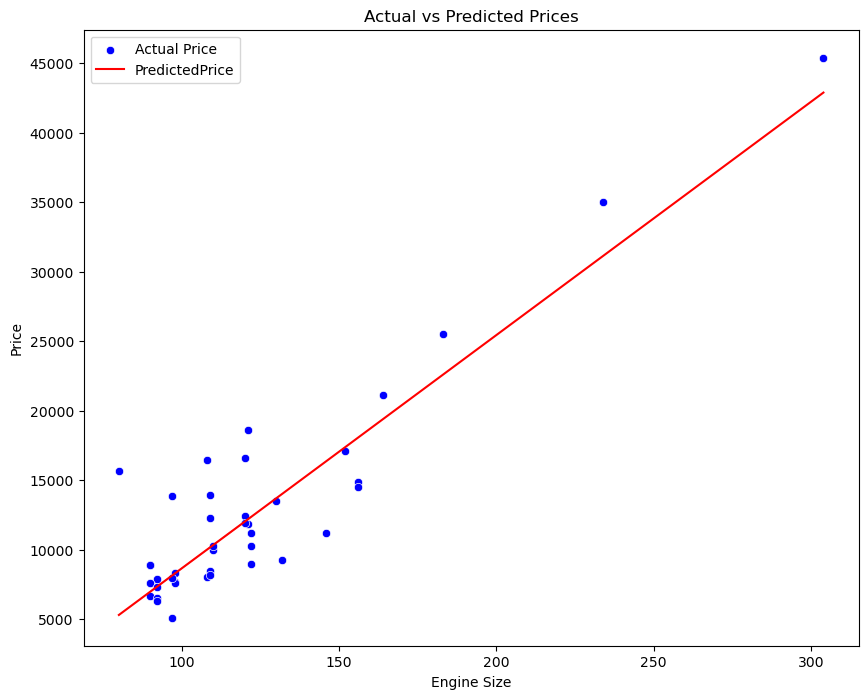

In [34]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='enginesize', y='price', data=final_df, color = 'blue', label='Actual Price')

sns.lineplot(x='enginesize', y='PredictedPrice', data=final_df, color='red', label='PredictedPrice')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend()

# Show the plot
plt.show()

#### Creating a Residual Plot

- relplot is a function in Seaborn, a popular Python visualization library, that provides a convenient interface for creating relational plots. Relational plots are used to visualize relationships between variables, often involving scatter plots or line plots.

<Axes: xlabel='enginesize', ylabel='price'>

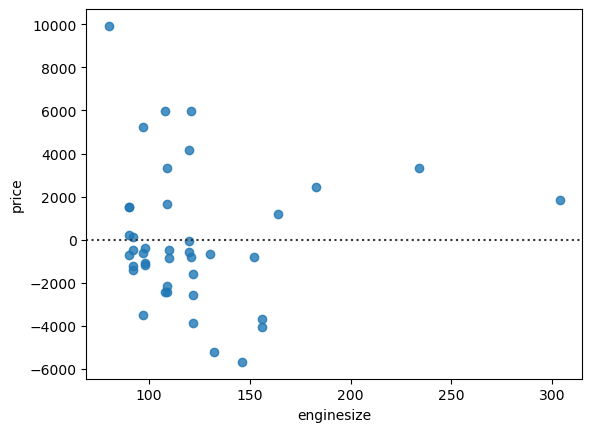

In [36]:
sns.residplot(x = final_df['enginesize'], y=final_df['price'])

In [35]:
# Lets view the Residuals -> actual - price
final_df['Residuals'] = final_df['PredictedPrice'] - final_df['price']

C:\Users\daivi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


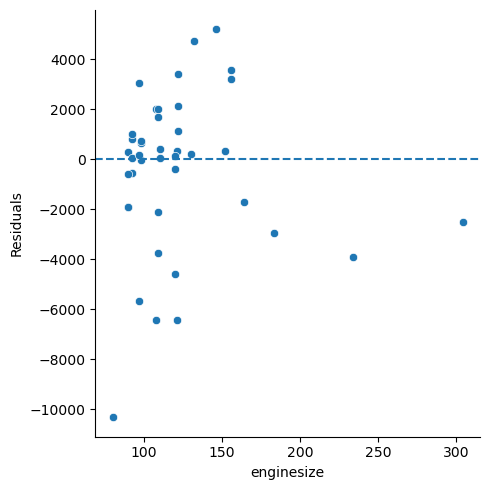

In [37]:
g = sns.relplot(data = final_df, x='enginesize', y='Residuals', kind = 'scatter')
for ax in g.axes.flat:
    ax.axhline(0, ls='--')

#### lmplot

- lmplot is another function in Seaborn, specifically designed for visualizing linear relationships between two variables. It’s a powerful tool for both exploring data and fitting regression models, and it offers more advanced functionality compared to relplot when it comes to regression analysis
- lmplot fits and plots a linear regression model between the two variables you specify, showing both the data points and the regression line.
- By default, it also plots a confidence interval around the regression line, which represents the uncertainty of the model's predictions.

C:\Users\daivi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


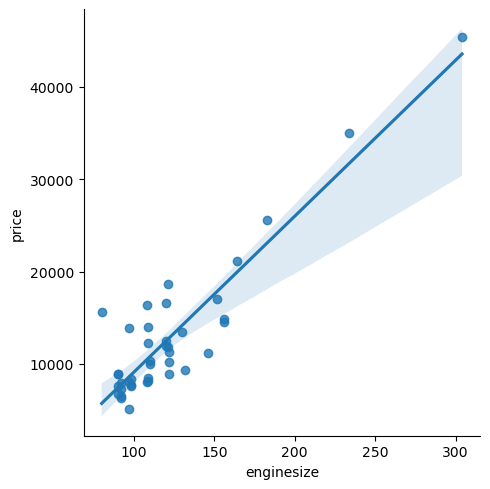

In [38]:
sns.lmplot(x = 'enginesize', y='price', data=final_df)

#### kdeplot
- kdeplot is a function in Seaborn used to plot Kernel Density Estimation (KDE), which is a non-parametric way to estimate the probability density function of a continuous variable. kdeplot is particularly useful for visualizing the distribution of data and understanding the underlying density of a dataset.
- kdeplot uses Kernel Density Estimation to plot a smooth curve that represents the density of a dataset. This curve gives you an idea of where the data points are concentrated.
- It’s an alternative to histograms for visualizing the distribution of data, but unlike histograms, KDE plots are smooth and continuous.

<Axes: xlabel='Residuals', ylabel='Density'>

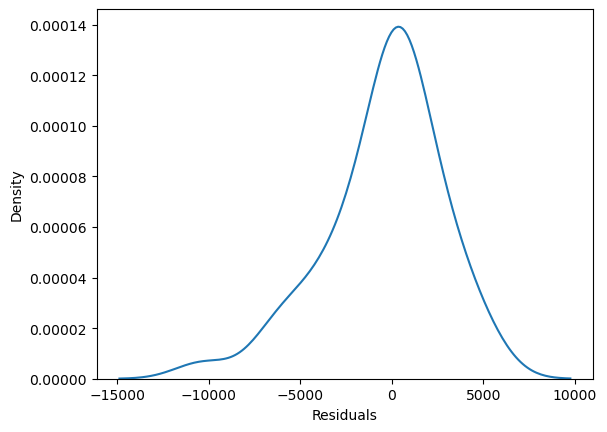

In [39]:
sns.kdeplot(final_df, x='Residuals')

### How to create a multiple regression model

In [46]:
X_train, X_test, y_train, y_test = train_test_split(
    df[['enginesize', 'curbweight']], 
    df[['price']], test_size=0.2, random_state=24)

In [47]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(164, 2)
(41, 2)
(164, 1)
(41, 1)


In [48]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [49]:
model.score(X_test, y_test)

0.6507099027568909

In [50]:
y_pred = model.predict(X_test)

In [51]:
y_pred[0:5]

array([[20378.46278467],
       [ 7757.01483488],
       [ 7310.05960396],
       [ 6500.83355975],
       [17048.76489931]])

In [57]:
pred_df = pd.DataFrame(y_pred, columns=['Predicted Price'])

final_df = pred_df.join([X_test.reset_index(drop = True), y_test.reset_index(drop=True)])
final_df.rename(columns = {'price':'actualPrice'}, inplace = True )
final_df = final_df[['enginesize', 'curbweight', 'actualPrice','Predicted Price']]  # setting the order/sequence of columns

final_df.head()

,enginesize,curbweight,actualPrice,Predicted Price
0,164,3055,24565.0,20378.462785
1,98,2109,7198.0,7757.014835
2,97,2050,5118.0,7310.059604
3,92,2004,6669.0,6500.833560
4,141,2912,12940.0,17048.764899


#### Lets plot the residual plot

In [67]:
final_df['residuals'] = final_df['Predicted Price'] - final_df['actualPrice']
final_df.head()

,enginesize,curbweight,actualPrice,Predicted Price,Residuals,residuals
0,164,3055,24565.0,20378.462785,-4186.537215,-4186.537215
1,98,2109,7198.0,7757.014835,559.014835,559.014835
2,97,2050,5118.0,7310.059604,2192.059604,2192.059604
3,92,2004,6669.0,6500.833560,-168.166440,-168.166440
4,141,2912,12940.0,17048.764899,4108.764899,4108.764899


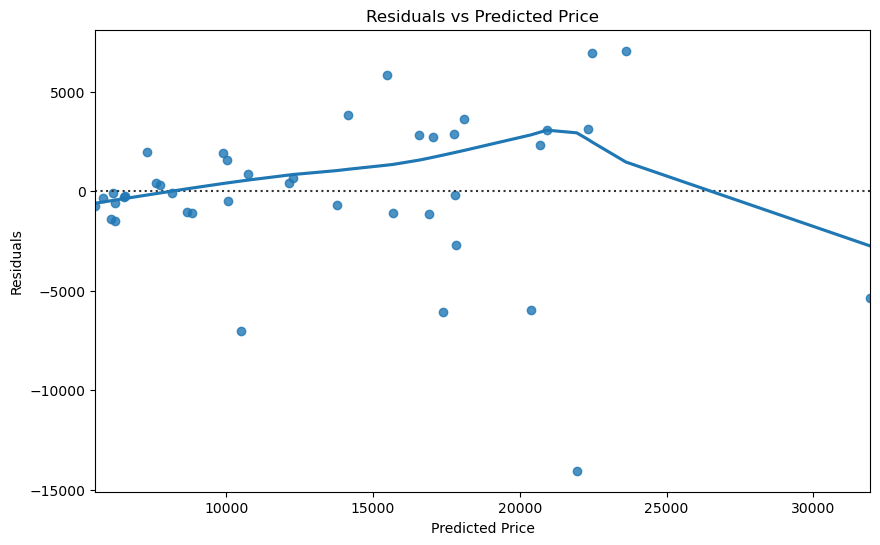

In [68]:
plt.figure(figsize=(10, 6))
sns.residplot(x=final_df['Predicted Price'], y=final_df['residuals'], lowess=True)
plt.title('Residuals vs Predicted Price')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.show()

- Looks like our model does not fit the data well

<Axes: xlabel='residuals', ylabel='Density'>

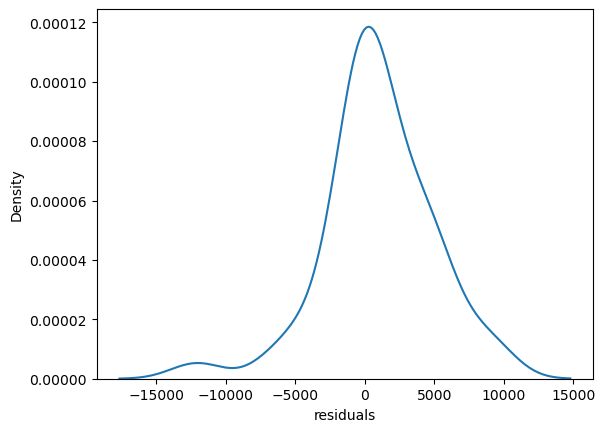

In [69]:
sns.kdeplot(data = final_df, x='residuals')

- The distribution of Residuals is not symmetric this is not good
- Again, most of the residuals are within -5000 to +5000 , and they are centred on x = 0.
- Also, the outliers are still affecting the regression on the negative side of the curve.
- The curve has got slightly thinner